<a href="https://colab.research.google.com/github/mhtattersall/Pandas/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install pandas
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# A pandas series is 1-dimensional labelled array capable of holding any data type
aList = [1,2,3,4]
s1 = pd.Series(data=aList) # pass list, will return with a default index 0-3
bList = ['a','b','c','d']
s2 = pd.Series(data=aList, index=bList) # pass list and index.  Works the same (aList, bList)
s3 = pd.Series([3, -5, 7, 4],  index=['a',  'b',  'c',  'd']) # can hard code both the list and the index
s3[1] = -4 # amend second element to a new value
s4 = s2[['a','c']] # slice the list using the index. Creates a copy with independent memory
s4

<ipython-input-2-303b6f087845>:7: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  s3[1] = -4 # amend second element to a new value


,0
a,1
c,3


In [3]:
# Feed a dictionary into a pandas series. The keys become the index
myDict = {'a':1, 'b':2, 'c':3, 'd':4}
s5 = pd.Series(myDict)
s5

,0
a,1
b,2
c,3
d,4


In [4]:
# Create dates as an index
myTimes = pd.date_range(start='2021-02-01 07:00', freq='d', periods=4, tz='Europe/Berlin')
s6 = pd.Series(data=aList, index=myTimes)
s6

,0
2021-02-01 07:00:00+01:00,1
2021-02-02 07:00:00+01:00,2
2021-02-03 07:00:00+01:00,3
2021-02-04 07:00:00+01:00,4


In [5]:
# A pandas dataframe is a 2-dimensional labeled data structure with columns of potentially different data types.
# Each single column has to be of the same data type.
# get a df from the contents of a dictionary
data = {'Country': ['Belgium',  'India',  'Brazil'],
        'Capital': ['Brussels',  'New Delhi',  'Brasilia'],
        'Population': [11190846, 1303171035, 207847528]}
df = pd.DataFrame(data=data,columns=['Country',  'Capital',  'Population'])
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasilia,207847528


In [6]:
# constructing a df
cols = list('ABCD')
np.random.seed(seed=1) # to make data replicable
myArr = np.random.randint(0,100,size=(5,4)) # create random integers
df1 = pd.DataFrame(data=myArr, columns=cols)
df2 = pd.DataFrame(data=myArr, columns=['Region','Rep','Items','Total'])
indx = pd.date_range(start='21/1/2020',freq='D',periods=5)
df3 = pd.DataFrame(data=myArr, index=indx, columns=['Region','Rep','Items','Total'])
df3['New'] = df3['Rep'] + df3['Items'] # create a new column with an operation on 2 existing columns
df3

,Region,Rep,Items,Total,New
2020-01-21,37,12,72,9,84
2020-01-22,75,5,79,64,84
2020-01-23,16,1,76,71,77
2020-01-24,6,25,50,20,75
2020-01-25,18,84,11,28,95


In [7]:
# constructing a df with lists
df4 = pd.DataFrame() # initiate an empty df
# populate the empty df with lists
names = ['john','anne','mary']
emails = ['john@mit.edu','anne@mit.edu','mary@mit.edu']
courses = [1,3,6]
df4['Name'] = names
df4['Email'] = emails
df4['Course'] = courses
df4

,Name,Email,Course
0,john,john@mit.edu,1
1,anne,anne@mit.edu,3
2,mary,mary@mit.edu,6


In [8]:
# create a dataframe within multi-tier column labels
gt20 = [30,75.0,10,25.0,40,100]
lt20 = [9,9.0,90,91.0,99,100]
nvr =[1,0.3,300,99.7,301,100]
ttl = [40,9.0,400,91.0,440,100]
# cols = ['N','%','N','%','N','%'] # use this for single-tiered column labels
idx = ['>20 Yrs','<20 Yrs','Never','Total'] # use this for single-tiered row labels
multicol1 = pd.MultiIndex.from_tuples([('Yes', 'N'),
                                       ('Yes', '%'),
                                       ('No', 'N'),
                                       ('No','%'),
                                       ('Total', 'N'),
                                       ('Total', '%')]) # creates two-tiered column labels
multicol2 = pd.MultiIndex.from_tuples([('Non Mel Skin Cancer','Yes', 'N'),
                                       ('Non Mel Skin Cancer','Yes', '%'),
                                       ('Non Mel Skin Cancer','No', 'N'),
                                       ('Non Mel Skin Cancer','No','%'),
                                       ('Total', 'N'), ('Total', '%')]) # creates three-tiered column labels
multirow1 = pd.MultiIndex.from_tuples([('Sun','>20Yrs'),
                                      ('Sun','<20Yrs'),
                                      ('Sun','Never'),
                                      ('Sun','Total')],
                                       names=['Sun Exposure','Years']) # creates two-tiered row labels with names for each
df7 = pd.DataFrame([gt20,lt20,nvr,ttl], index=multirow1, columns = multicol2)
df7['Non Mel Skin Cancer','Yes','N'] # use the tuple as a key to return the column values (which is also a Series)
df7

Non Mel Skin Cancer                  Total     
                                    Yes         No           N    %
                                      N     %    N     %   NaN  NaN
Sun Exposure Years                                                 
Sun          >20Yrs                  30  75.0   10  25.0    40  100
             <20Yrs                   9   9.0   90  91.0    99  100
             Never                    1   0.3  300  99.7   301  100
             Total                   40   9.0  400  91.0   440  100

In [9]:
# assign index and column headers
# pandas will assign a default integer based index unless you specify a index
# Example: (assign a custom index)
data = {'Country': ['Belgium',  'India',  'Brazil'],
        'Capital': ['Brussels',  'New Delhi',  'Brasilia'],
        'Population': [11190846, 1303171035, 207847528]}
df = pd.DataFrame(data,columns=['Country',  'Capital',  'Population'])
# custom_index = ['a', 'b', 'c']
# df = pd.DataFrame(data, index=custom_index)
# Example: (specify a col as the index)
# df.set_index('Country', inplace=True) # sets a new col to be the index, (drop=False) to also retain the col in the df
# df.re-index() # used to conform a df to a new custom index
# df.re-index(drop=True) '# used to drop index and reset to a range index
# sort_index() # used to sort an index (ascending order by default)
# create an index
# df = DataFrame(np.random.rand(50,5)) # simple default integer indexes
# df = DataFrame(np.random.rand(500,5)) # with a time-stamp row index:
# new_index = pd.date_range('1/1/2005', periods=len(df), freq='M') # generate date index label for month ends
# df.index = new_index # assign new index
# df.index.name = "my_index_name" # assign a name for an index
# df.index.name #return index name
# df.index = range(1,len(df)+1) # increment a 0 based index by 1
# df.columns = ["", "", ""] # assign new col labels as a list
# df.rename(columns={'Name': 'Full Name'}, inplace=True) # change a single column label
# df.columns.values[0] = 'first_name', iinplace=True) # alt change a single column label
# df.rename(index={"old_name":""new_name"},inplace=True) # change an index label using dict format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     3 non-null      object
 1   Capital     3 non-null      object
 2   Population  3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [10]:
# file handling
# see pandas documentation on IO tools https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
# pd.read_csv('file.csv', header=None, nrows=5) # read csv # use('data/file.csv') if reading from a folder
# df.to_csv('myDataFrame.csv') # write to csv
# pd.read_excel('file.xlsx') # read excel
# df.to_excel('dir/myDataFrame.xlsx', sheet_name='Sheet1') # write to excel
# xlsx = pd.ExcelFile('file.xls') # read multiple sheets from the same file
# df_sheet1 = pd.read_excel(xlsx, 'Sheet1') # new line for each sheet
# df_sheet2 = pd.read_excel(xlsx, 'Sheet2')
# Each Excel sheet in a Python dictionary key is sheet_name, value is a df
'''
workbook = pd.ExcelFile('file.xlsx')
d = {} # start with an empty dictionary
for sheet_name in workbook.sheet_names:
 df = workbook.parse(sheet_name)
 d[sheet_name] = df
'''
# d = df.to_dict() # save df to a dict
# m = df.as_numpy() # save to numpy array (or df.values())
# pd.Series(d) # convert a dictionary to a pandas Series
# pd.read_html()
# df.to_html()
# downloading in Colab. Copy file to content in files, then copy path
# df = pd.read_csv('//content/sample_data/fruits_dataset.csv')

"\nworkbook = pd.ExcelFile('file.xlsx')\nd = {} # start with an empty dictionary\nfor sheet_name in workbook.sheet_names:\n df = workbook.parse(sheet_name)\n d[sheet_name] = df\n"

In [11]:
# Read and write a Series to JSON
myArray = np.array([1,2,3,4])
mySeries = pd.Series(myArray)
# mySeries.to_json('myfile.json') # writes to a json file
mySeries.to_json(orient='index') # write to local memory, orient with index. Outputs a dictionary
# (orient='records) returns just the values as a list in a string
# pd.read_json(_, orient='index') # read json. The underscore instructs to read from local memory. Outputs a dataframe. Slice with df[0] to return a series.
# Note: need to write and call from local memory in 2 stages as otherwise it returns an error

'{"0":1,"1":2,"2":3,"3":4}'

In [12]:
# read and write to SQL Query or Database Table
# from sqlalchemy import create_engine
# engine = create_engine('sqlite:///:memory:')
# pd.read_sql(SELECT * FROM my_table;, engine) # read query
# pd.read_sql_table('my_table', engine) # read table
# pd.read_sql_query(SELECT * FROM my_table;', engine) # read query
# df.to_sql('myDf', engine) # write to sql database

In [13]:
# Selecting items and subsets
# df.copy() # create a copy with a new deep copy of a df.
# df["Country"] # select a specified col
# df.Country # select a specified col using dot notation
# df[["Country","Capital"]] # select 2 or more cols - a list inside [], can change order of cols by selecting in an order
# iloc uses index numbers, loc uses label names
# df.iloc[0] # select first row using index number
# df.iloc[-1] # select last row
# df.iloc[:5] # select first 5 rows
# df.iloc[:] # select all rows
# df.iloc[:,2] # select col at index 2
# df.iloc[[23,45,101]] # select a list of specific rows
# df.iloc[0:2,-2:] # select items in first 2 rows and the last 2 cols
# df.loc[[0,1],['Capital','Population']] # select items using row (index) and col labels
# df.iat[1, 2] # select single item at second row and third col
# df.at[0,'Country'] # select single item using row (index) and col labels
# df[1:] # all rows leaving first row, not inplace (inplace=True to change original)


In [14]:
# filtering
# df.loc[df.Country == 'India'] # returns all rows that meet condition
# df[df['Population']>1200000000] # returns all rows that meet comdition
# df.loc[df.Population.between(200000000,2000000000,inclusive=True)] # retuns all row between specified values
# mask_1 = df.Country == "India" # set a mask (filter)
# df_India = df.loc[mask_1] # return all rows that comply with mask_1
# df_India
# mask_2 = df.dtypes == object # set a mask on datatype
# df_numeric = df.loc[:,~mask_2] # all cols that are NOT mask_2, [:,] used for cols
# df_numeric
# df_India_numeric = df.loc[mask_1,~mask_2] # combine both masks
# mask_1 # returns a boolean Series with the mask applied
# (mask_1 & mask_2).head() # return a boolean Series applying both masks with a logical operator, and displaying the head of the Series
# df.loc[mask_1 & mask_2, ["",""]] # apply masks with a logical operator and return specified cols
# my_countries = ["Belgium","Brazil"]
# df.Country.isin(my_countries) # returns a boolean Series
# df.loc[df.Country.isin(my_countries)] # returns rows for specified Countries
# df.loc[~df.Country.isin(my_countries)] # returns rows for NOT specified Countries
# can also filter where(), query(), filter(), select()

In [15]:
# drop items from a df
# df.drop('Country', axis=1, inplace=True) # drop a column. Inplace=True modifies the underlying df, otherwise we just have a view
# ['Country','Population'] place column labels in a list if dropping more than 1
# df.drop(0, axis=0, inplace=True) # drop a row
# drinks = drinks.drop(drinks.columns[0], axis=1) # drop the first column

In [16]:
# change data type
# df['Population'].astype(int) # change datatype of specified col

In [17]:
# sorting and ranking
# df.sort_index() # sort a df by its index
# df.sort_values(by='Country') # sort a df by the values in a column (ascending=False,na_position="last")
# df.sort_values.Country() # sort a column by values to return a Series
# df.rank() # assign ranks to the elements in each column
# the rank of an element is its position in the ascending order of values within the column
# ties are assigned the average of the ranks they would have received in case of no ties

In [18]:
# information, aggregates and views
# df.info() # returns info on index, columns, shape, datatypes, nulls, memory usage
# df.describe() # returns descrptive stats for each col: count, mean, std, min, 25%, 50%, 75%, max
# df.shape() # returns a tuple with the dimensions of the df
# df.shape[0] # returns no of rows
# df.shape[1] # returns no of cols
# len(df) # retuns no  of rows
# df.size # row count x col count
# df.index # returns the row index (labels that uniquely identify each row)
# df.columns # returns the the col index (labels that uniqule identy each col)
# df.axes # access both row and col index
# df.dtypes # list datatypes of each col
# df.count() # returns a total count of the non-null values in each col
# df.count().sum() # returns a count of total non-null values in the df
# df.isnull().sum().sum() # returns a count of all the NaNs in the df
# df.head() # view first rows of df (default is 5)
# df.tail() # view last rows of df (default is 5)
# df.T # transpose row and cols
# top_left_corner = df.iloc[:4,:4] # top left hand corder of df
# df['Population'].sum() # sum the values in a specific col
# df['Population'].cumsum() # returns the cumulative sum of values in a specific col in a df
# df.min() # returns a Series representing the minimum values in the corresponding cols
# df.Population.min() # returns min value for a specified col
# df.max()
# df.mean()
# df.median()
# df.sum() # sums the values in each col
# df.abs(), add(), cummax(), cummin(), cumsum(), diff(), div(), dot(),
# df.corr() # returns correllation between cols
# df.col_1.corr(df.col_2) # returns correlation between 2 specific cols
# df.iteritems() # returns a tuple containing the column name and the corresponding column as a Series which can be accesses with a key value eg df['female'].
# for column_name, column_series in df.items():
#    print(f"\nColumn Name: {column_name}")
#    print("Column Series:")
#    print(column_series)
# df['Country'].unique() # returns array of unique values in a col.  Only works on a Series at a time
# len(df.Country.unique()) # returns no of unique values in a col
# df.nunique() # count the number of unique values in each col of a df (dropna = True/False)
# value_counts_df = df.Capital.value_counts() # provides the count of occurrences of each unique value in a specified col. Returns a Series
# Example: (print top three value counts)
# icount = 3
# for i, v in value_counts_df.iteritems:
#    if icount > 0: print(i,v)
#    icount = icount -1
# df.Capital.isnull().sum(axis=0) # sums the NaNs in a column (value_counts() ignores the nulls)
# value_counts_df = df.apply(lambda x: x.value_counts()) # apply value_counts to an entire df
# df.index[0] # returns row index label at specified position
# df.columns[1] # returns col label at specified position
# df.columns.tolist() # returns column labels to a list
# df.columns.is_unique # returns bool T/F s all col labels are unique
# df.columns.get_loc('Capital') # returns col index position for a specifed label
# df.agg({'Age':['max', 'min'],'Weight':['mean']}) # aggregate using one or more operations over specified columns.

In [19]:
# applying functions
# f = lambda x: x*2 # example function to square each value
# df['ColumnName'].apply(f) # apply function to a specific col
# df.applymap(f) # apply function to an entire df

In [20]:
# handling missing values
# df.fillna(0) # fill all missing values (NaN) with specified value # add inplace=True for change to be permanent
# df.fillna({'Score': 0, 'Age': 999}) # fill missing values with specific values for each col
# mean_population = df.Population.mean()
# df.Population.fillna(value=mean_population,inplace=True) # replace nas with mean
# df.dropna(axis=0) # drops rows with any missing values # add inplace=True for change to be permanent
# df.dropna(axis=1, thresh =500) # drops cols with any missing values, with a threshold for a col to be dropped
# df.ffill(), df.bfill() fills missing values with the last non-null values encountered along a specified axis.
# ffill propogates the last valid observation forward until the next valid observation
# bfill propogates the last valid observation backwards until the next valid observation
# df.iloc[1,1] = None # assign a missing value to None
# df.iloc[1,1] = np.nan # assign a missing value to NaN (not a number)
# Note: white space in a csv file will result in an empty string object (not a null or a NaN)
# Note: missing a value completely in a csv file will result in 'no data#' (not a null or a NaN)
# df.isna() # return boolean checking if every item is missing or NaN values
# df.notna() # return boolean checking if every item is NOT missing or NaN values
# df.isna().sum() # return a sum of nas in each column # alt is df.isnull() it does exactly the same thing
# df.loc[df.Country.notna()] # return rows wihtout nas in Country col

In [21]:
# one-hot encoding - converts categorical variables into numerical values
cols = list('ABCD')
np.random.seed(seed=1)
myArr = np.random.ranf(size=(5,4))
df6 = pd.DataFrame(data=myArr, columns=cols)
df6['Fruit'] = ['apple','pear','orange','pear','apple'] # add a new  column and values
one_hot = pd.get_dummies(df6['Fruit']) # getr dummy variables fruit
df6 = df6.join(one_hot) # joiin the one-hot columns to the df
df6.drop('Fruit',axis=1,inplace=True) # drop the original fruit column
df6

,A,B,C,D,apple,orange,pear
0,0.417022,0.720324,0.000114,0.302333,True,False,False
1,0.146756,0.092339,0.186260,0.345561,False,False,True
2,0.396767,0.538817,0.419195,0.685220,False,True,False
3,0.204452,0.878117,0.027388,0.670468,False,False,True
4,0.417305,0.558690,0.140387,0.198101,True,False,False


In [22]:
# merging (SQL-like combination based on common cols or index) - joins
# df.merge() # used to merge two or more dfs based on a common column or index
# merged_df = df1.merge(df2, on='key') # merge DataFrames based on the 'key' column.
# merged_df_custom = df1.merge(df2, how='outer', left_on='key', right_on='key') # these parameters specify the type of join
# merge handles duplicate values based on specified merge keys
df_first = pd.DataFrame({'STUDENT_ID':['S1234','S4321','S3333','S4444'],'FIRST_NAME':['Daniel','Alfredo','Gertrude','Ying']})
df_last = pd.DataFrame({'STUDENT_ID':['S4321','S3333','S4444','S5678'],'LAST_NAME':['Smith','Gupta','Minard','Gonzales']})
print(df_first)
print(df_last)
# Example: (inner join) - returns only rows with matching values in both original dfs
pd.merge(df_first, df_last, on="STUDENT_ID", how="inner") # Student_ID is the join key, "inner" is the type of join
# Example: (outer join) - returns all rows in the original dfs with NaNs to fill missing data
pd.merge(df_first, df_last, on="STUDENT_ID", how="outer")
# Example: (left join) - discards rows from the right df that do not have matching values in the left df
pd.merge(df_first, df_last, on="STUDENT_ID", how="left")
# Example: (rightt join) - discards rows from the left df that do not have matching values in the right df
pd.merge(df_first, df_last, on="STUDENT_ID", how="right")

  STUDENT_ID FIRST_NAME
0      S1234     Daniel
1      S4321    Alfredo
2      S3333   Gertrude
3      S4444       Ying
  STUDENT_ID LAST_NAME
0      S4321     Smith
1      S3333     Gupta
2      S4444    Minard
3      S5678  Gonzales


,STUDENT_ID,FIRST_NAME,LAST_NAME
0,S4321,Alfredo,Smith
1,S3333,Gertrude,Gupta
2,S4444,Ying,Minard
3,S5678,NaN,Gonzales


In [23]:
# concatenating (stack on an axis) - union based on common index
# pd.concat() # use to combine two or more dfs along a particular axis
# pd.concat([df1, df2], axis=1) # concatenates along cols based on a common index
# pd.concat([df1, df2], axis=0) # concatenates along rows based on a common index
# concat does not merge duplicate values, it stacks them.
# Example:
df_first_names_1 = pd.DataFrame({'STUDENT_ID':['S1234','S4321'],'FIRST_NAME':['Daniel','Alfredo']})
df_first_names_2 = pd.DataFrame({'STUDENT_ID':['S3333','S4444'],'FIRST_NAME':['Gertrude','Ying']})
df_first_names = pd.concat([df_first_names_1,df_first_names_2]).reset_index(drop=True) # reset index
# drop=True is used to drop the existing index column and replace it with the default integer index.
df_first_names

,STUDENT_ID,FIRST_NAME
0,S1234,Daniel
1,S4321,Alfredo
2,S3333,Gertrude
3,S4444,Ying


In [24]:
# append is used to add a df/series-like object at the end of the current df/series
# df1.append(df2) # ignore_index=True is used to reset the index of the resulting series # inplace=True used to amend the original df

In [25]:
# drop duplicates
# method used to remove duplicate rows. Considers all columns by default, can specify specific columns.
# df.drop_duplicates(subset=['Name', 'Age']) # keep{‘first’, ‘last’, False}, default ‘first’ determines which duplicates (if any) to keep.
# ‘first’ : Drop duplicates except for the first occurrence. ‘last’ : Drop duplicates except for the last occurrence. False : Drop all duplicates.

In [26]:
# datetime
# df['Date']= pd.to_datetime(df['Date']) # converts values in 'Date' column to datetime objects and assigns them back to the same column
# df['Date']= pd.date_range(start='2000-1-1',periods=6,freq='M') # generates a sequence of dates and assigns it to a 'Date' column
# changing a seried index to time
myDict = {'a':1, 'b':2, 'c':3, 'd':4}
mySeries = pd.Series(myDict) # convert a dictionary to a series
mySeries.index = pd.date_range(start='1/1/2018',periods=4) # create a new index based on 4 periods (default is days)
# mySeries.to_json( orient='index') # when you convert the index to JSON, notice the time stored as an epoch in milliseconds.
# Unix Epoch time is the number of seconds since 1 January 1970.
# unixtime = time.time() # returns the time now in seconds since midnight 1/1/70.
# dt_now = datetime.datetime.now() # returns a local datetime now (this is timezone aware)
# utc_now = datetime.datetime.utcnow() # returns the UTC datetime now # UTC is set to Greenwich.
# localtime = reference.LocalTimezone()
# localtime.tzname(today) #' returns name of tz where your computer is located
# mySeries.to_json( orient='index',date_format='iso') # this reads the date is ISO format
# data = pd.read_json(_, orient='index') # this code reads the data back from local memory JSON format
# type(data.index)
# Note: need to write and call from local memory in 2 stages as otherwise it returns an error
# can access a datetime object e.f. to perform a value count (ufo['Time'].dt.hour.value_counts())
# then select the hour in the resultant Series e.g. hours[22]

In [33]:
# reshaping data
# Example:(pivot - narrow to wide)
data = {'Country': ['USA', 'USA', 'Canada', 'Canada', 'Germany', 'Germany'],
        'Year': [2020, 2021, 2020, 2021, 2020, 2021],
        'Population': [331, 333, 38, 39, 83, 82],
        'GDP': [21.43, 21.43, 1.84, 1.85, 4.42, 4.42]}
df8 = pd.DataFrame(data)
print("Original DataFrame:")
print(df8)
pivot_df8 = df8.pivot(index='Country', columns='Year') # Pivot the DataFrame based on 'Country' column and 'Year' as the index
print("\nPivoted DataFrame:")
print(pivot_df8)
# MIT example (pivot_table) - this resolves duplicate indexes, which .pivot does not
df9 = pd.read_csv('//content/sample_data/fruits_dataset.csv') #copy file to content in files, then copy path
df9
pivot_table_df9 = df9.pivot_table(index=['region','fruits'],columns='cost',values='units')
pivot_table_df9
# use stack() and unstack() to shift inner most categories of pivot tables to make the table wider (unstack) or narrower (stack)
# pivot_df8.unstack()
df10 = pd.read_csv('//content/sample_data/drinks_dataset.csv')
df10.head()
df10_pivot_table = pd.pivot_table(df10, index=['continent','country'], values=['total_litres_of_pure_alcohol'], aggfunc=['mean','sum','max'])
df10_pivot_table

Original DataFrame:
   Country  Year  Population    GDP
0      USA  2020         331  21.43
1      USA  2021         333  21.43
2   Canada  2020          38   1.84
3   Canada  2021          39   1.85
4  Germany  2020          83   4.42
5  Germany  2021          82   4.42

Pivoted DataFrame:
        Population         GDP       
Year          2020 2021   2020   2021
Country                              
Canada          38   39   1.84   1.85
Germany         83   82   4.42   4.42
USA            331  333  21.43  21.43


mean  \
                           total_litres_of_pure_alcohol   
continent     country                                     
Africa        Algeria                               0.7   
              Angola                                5.9   
              Benin                                 1.1   
              Botswana                              5.4   
              Burkina Faso                          4.3   
...                                                 ...   
South America Paraguay                              7.3   
              Peru                                  6.1   
              Suriname                              5.6   
              Uruguay                               6.6   
              Venezuela                             7.7   

                                                    sum  \
                           total_litres_of_pure_alcohol   
continent     country                                     
Africa        Algeria                               0.7   
              Angola                                5.9   
              Benin                                 1.1   
              Botswana                              5.4   
              Burkina Faso                          4.3   
...                                                 ...   
South America Paraguay                              7.3   
              Peru                                  6.1   
              Suriname                              5.6   
              Uruguay                               6.6   
              Venezuela                             7.7   

                                                    max  
                           total_litres_of_pure_alcohol  
continent     country                                    
Africa        Algeria                               0.7  
              Angola                                5.9  
              Benin                                 1.1  
              Botswana                              5.4  
              Burkina Faso                          4.3  
...                                                 ...  
South America Paraguay                              7.3  
              Peru                                  6.1  
              Suriname                              5.6  
              Uruguay                               6.6  
              Venezuela                             7.7  

[193 rows x 3 columns]

In [28]:
# reshaping data
# Example: (stack)
data = {'Country': ['USA', 'USA', 'Canada', 'Canada', 'Germany', 'Germany'],
        'Year': [2020, 2021, 2020, 2021, 2020, 2021],
        'Population': [331, 333, 38, 39, 83, 82],
        'GDP': [21.43, 21.43, 1.84, 1.85, 4.42, 4.42]}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
stacked_df = df.set_index(['Country', 'Year']).stack() # Stack with 'Country' and 'Year' cols as the multi-level index
print("\nStacked DataFrame:")
print(stacked_df)

Original DataFrame:
   Country  Year  Population    GDP
0      USA  2020         331  21.43
1      USA  2021         333  21.43
2   Canada  2020          38   1.84
3   Canada  2021          39   1.85
4  Germany  2020          83   4.42
5  Germany  2021          82   4.42

Stacked DataFrame:
Country  Year            
USA      2020  Population    331.00
               GDP            21.43
         2021  Population    333.00
               GDP            21.43
Canada   2020  Population     38.00
               GDP             1.84
         2021  Population     39.00
               GDP             1.85
Germany  2020  Population     83.00
               GDP             4.42
         2021  Population     82.00
               GDP             4.42
dtype: float64


In [29]:
# reshaping data
# Example: (melt - wide to narrow)
data = {'Country': ['USA', 'Canada', 'Germany'],
        '2020_Population': [331, 38, 83],
        '2020_GDP': [21.43, 1.84, 4.42],
        '2021_Population': [333, 39, 82],
        '2021_GDP': [21.43, 1.85, 4.42]}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
melted_df = pd.melt(df, id_vars=['Country'], var_name='Year_Variable', value_name='Value')
# 'Country' is the idenfier variable. Assign names to collected columns labels and collected values
print("\nMelted DataFrame:")
print(melted_df)

Original DataFrame:
   Country  2020_Population  2020_GDP  2021_Population  2021_GDP
0      USA              331     21.43              333     21.43
1   Canada               38      1.84               39      1.85
2  Germany               83      4.42               82      4.42

Melted DataFrame:
    Country    Year_Variable   Value
0       USA  2020_Population  331.00
1    Canada  2020_Population   38.00
2   Germany  2020_Population   83.00
3       USA         2020_GDP   21.43
4    Canada         2020_GDP    1.84
5   Germany         2020_GDP    4.42
6       USA  2021_Population  333.00
7    Canada  2021_Population   39.00
8   Germany  2021_Population   82.00
9       USA         2021_GDP   21.43
10   Canada         2021_GDP    1.85
11  Germany         2021_GDP    4.42


In [30]:
# group by
# Example:
data = {'Country': ['USA', 'Canada', 'Germany', 'USA', 'Canada'],
        'Population': [331, 36, 83, 329, 40],
        'GDP': [21.81, 1.8, 4.42, 21.99, 1.88]}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
grouped_df = df.groupby(by=['Country']).mean()
print("\nGrouped DataFrame with mean for each 'Population' group:")
print(grouped_df)

Original DataFrame:
   Country  Population    GDP
0      USA         331  21.81
1   Canada          36   1.80
2  Germany          83   4.42
3      USA         329  21.99
4   Canada          40   1.88

Grouped DataFrame with mean for each 'Population' group:
         Population    GDP
Country                   
Canada         38.0   1.84
Germany        83.0   4.42
USA           330.0  21.90


<Axes: >

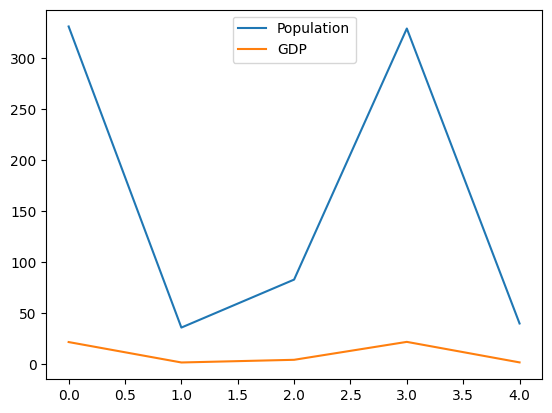

In [31]:
# visualisation
import matplotlib.pyplot as plt
df.plot()

In [35]:
# Analysing ufo dataset
ufo = pd.read_csv('//content/sample_data/ufo_dataset.csv', parse_dates=['Time'])
ufo

,Unnamed: 0,City,Colors Reported,Shape Reported,State,Time
0,0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...,...
18236,18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [49]:
# How many colours were reported, what were they and what were the top 3 reported colours?
colors = ufo['Colors Reported'].value_counts()
print("Number of different colours:",len(colors))
print(colors[0:3])

Number of different colours: 27
Colors Reported
RED       780
GREEN     531
ORANGE    528
Name: count, dtype: int64


In [50]:
# What were the top 3 cities with most sightings?
cities = ufo['City'].value_counts()
print(cities[0:3])

City
Seattle          187
New York City    161
Phoenix          137
Name: count, dtype: int64


In [51]:
# What time of day had most sightings?
hours = ufo['Time'].dt.hour.value_counts()
print(hours)

Time
21    2447
22    2329
20    1829
23    1699
19    1354
0     1207
18     975
1      818
2      688
17     607
3      515
16     412
12     394
13     377
15     372
14     355
4      327
5      317
10     256
11     227
6      210
9      188
7      186
8      152
Name: count, dtype: int64


In [52]:
# what day of week has most sightings?
ufo['Time'].head()

,Time
0,1930-06-01 22:00:00
1,1930-06-30 20:00:00
2,1931-02-15 14:00:00
3,1931-06-01 13:00:00
4,1933-04-18 19:00:00


In [56]:
# which day has most sightings?
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dayCounts = ufo['Time'].dt.dayofweek.value_counts()
d = {days[k]:v for k,v in dayCounts.items()} # create a dictionary with comprehension
d

{'Tuesday': 2822,
 'Sunday': 2689,
 'Saturday': 2687,
 'Friday': 2669,
 'Thursday': 2598,
 'Wednesday': 2476,
 'Monday': 2300}

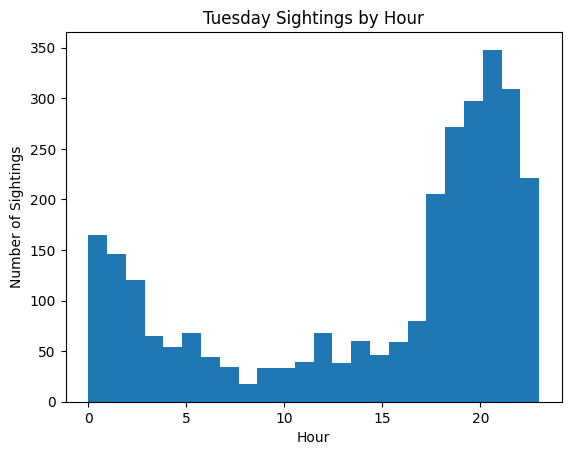

In [59]:
# plot sightings on Tuesdays
ufo['Day'] = ufo['Time'].dt.day_name() # add a day col to the ufo df
tues = ufo.loc[ufo['Day'] == 'Tuesday'] # create a view with all the Tuesday sightings
plt.hist(tues['Time'].dt.hour, bins=24)
plt.title('Tuesday Sightings by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Sightings')
plt.show()